In [1]:
import pandas as pd
import numpy as np

In [2]:
ads_index = pd.read_csv("./data/ads_data_index.csv")

In [3]:
ads_index

,count,groupMetadataID,start_time,end_time,nummsgs,filebase,folder,vehilceID,experimentID
0,1,3a116996-93a9-11ee-956e-9da2d070324c,1.674160e+18,1.674160e+18,1855470,/Deployment_2_SEOhio/Blue Route/OU Pacifica/16...,/Deployment_2_SEOhio/Blue Route/OU Pacifica/16...,OUPacifica,13
1,2,2837eb9c-9542-11ee-956e-9da2d070324c,1.683310e+18,1.683320e+18,1149980,/Deployment_2_SEOhio/Blue Route/OU Pacifica/16...,/Deployment_2_SEOhio/Blue Route/OU Pacifica/16...,OUPacifica,1
2,3,da853e0c-a10f-11ee-981c-d126ddbe9afa,1.684780e+18,1.684780e+18,459295,/Deployment_2_SEOhio/Blue Route/OU Pacifica/16...,/Deployment_2_SEOhio/Blue Route/OU Pacifica/16...,OUPacifica,2
3,4,154fab12-a43f-11ee-88ec-eb6a8d5269b4,1.684780e+18,1.684780e+18,559423,/Deployment_2_SEOhio/Blue Route/OU Pacifica/16...,/Deployment_2_SEOhio/Blue Route/OU Pacifica/16...,OUPacifica,3
4,7,ba6e1072-9524-11ee-956e-9da2d070324c,1.685540e+18,1.685540e+18,463801,/Deployment_2_SEOhio/Blue Route/OU Pacifica/16...,/Deployment_2_SEOhio/Blue Route/OU Pacifica/16...,OUPacifica,4
...,...,...,...,...,...,...,...,...,...
325,199,f8fd0fd8-f243-11ee-bb3f-fb353e7798cd,1.701200e+18,1.701200e+18,758506,/Deployment_2_SEOhio/GreenRoute/TRCVan2/170119...,/Deployment_2_SEOhio/GreenRoute/TRCVan2/170119...,Van2,1701196779
326,200,58d78342-f24a-11ee-bb45-fb353e7798cd,1.701200e+18,1.701200e+18,727298,/Deployment_2_SEOhio/GreenRoute/TRCVan2/170119...,/Deployment_2_SEOhio/GreenRoute/TRCVan2/170119...,Van2,1701198151
327,201,25135418-f250-11ee-bb4a-fb353e7798cd,1.701200e+18,1.701200e+18,751183,/Deployment_2_SEOhio/GreenRoute/TRCVan2/170119...,/Deployment_2_SEOhio/GreenRoute/TRCVan2/170119...,Van2,1701199673
328,202,cbdc93f4-f255-11ee-bb4e-fb353e7798cd,1.701200e+18,1.701200e+18,705558,/Deployment_2_SEOhio/GreenRoute/TRCVan2/170120...,/Deployment_2_SEOhio/GreenRoute/TRCVan2/170120...,Van2,1701203037


## Cleaning and calculations


In [4]:
if "vehilceID" in ads_index.columns:
    ads_index.rename({'vehilceID': 'vehicleID'}, axis=1, inplace=True)


# ads_index['duration'] = ads_index['end_time'] - ads_index['start_time']

example split of a string to extract route color


In [5]:
s = '/Deployment_2_SEOhio/Blue Route/OU Pacifica/1674155613/20230119141333.record.00000'

s.split("/")[2]

'Blue Route'

In [6]:
routes = ads_index["filebase"].copy().apply(lambda s: s.split("/")[2])
ads_index["route"] = routes
ads_index

,count,groupMetadataID,start_time,end_time,nummsgs,filebase,folder,vehicleID,experimentID,route
0,1,3a116996-93a9-11ee-956e-9da2d070324c,1.674160e+18,1.674160e+18,1855470,/Deployment_2_SEOhio/Blue Route/OU Pacifica/16...,/Deployment_2_SEOhio/Blue Route/OU Pacifica/16...,OUPacifica,13,Blue Route
1,2,2837eb9c-9542-11ee-956e-9da2d070324c,1.683310e+18,1.683320e+18,1149980,/Deployment_2_SEOhio/Blue Route/OU Pacifica/16...,/Deployment_2_SEOhio/Blue Route/OU Pacifica/16...,OUPacifica,1,Blue Route
2,3,da853e0c-a10f-11ee-981c-d126ddbe9afa,1.684780e+18,1.684780e+18,459295,/Deployment_2_SEOhio/Blue Route/OU Pacifica/16...,/Deployment_2_SEOhio/Blue Route/OU Pacifica/16...,OUPacifica,2,Blue Route
3,4,154fab12-a43f-11ee-88ec-eb6a8d5269b4,1.684780e+18,1.684780e+18,559423,/Deployment_2_SEOhio/Blue Route/OU Pacifica/16...,/Deployment_2_SEOhio/Blue Route/OU Pacifica/16...,OUPacifica,3,Blue Route
4,7,ba6e1072-9524-11ee-956e-9da2d070324c,1.685540e+18,1.685540e+18,463801,/Deployment_2_SEOhio/Blue Route/OU Pacifica/16...,/Deployment_2_SEOhio/Blue Route/OU Pacifica/16...,OUPacifica,4,Blue Route
...,...,...,...,...,...,...,...,...,...,...
325,199,f8fd0fd8-f243-11ee-bb3f-fb353e7798cd,1.701200e+18,1.701200e+18,758506,/Deployment_2_SEOhio/GreenRoute/TRCVan2/170119...,/Deployment_2_SEOhio/GreenRoute/TRCVan2/170119...,Van2,1701196779,GreenRoute
326,200,58d78342-f24a-11ee-bb45-fb353e7798cd,1.701200e+18,1.701200e+18,727298,/Deployment_2_SEOhio/GreenRoute/TRCVan2/170119...,/Deployment_2_SEOhio/GreenRoute/TRCVan2/170119...,Van2,1701198151,GreenRoute
327,201,25135418-f250-11ee-bb4a-fb353e7798cd,1.701200e+18,1.701200e+18,751183,/Deployment_2_SEOhio/GreenRoute/TRCVan2/170119...,/Deployment_2_SEOhio/GreenRoute/TRCVan2/170119...,Van2,1701199673,GreenRoute
328,202,cbdc93f4-f255-11ee-bb4e-fb353e7798cd,1.701200e+18,1.701200e+18,705558,/Deployment_2_SEOhio/GreenRoute/TRCVan2/170120...,/Deployment_2_SEOhio/GreenRoute/TRCVan2/170120...,Van2,1701203037,GreenRoute


### Decision Tree Stuff

In [7]:
blue_id  = ads_index[ads_index['route'] == 'Blue Route'].sort_values(by='experimentID')['groupMetadataID'].copy()

Just using a subset of blueroutes for now

In [21]:
route_count = blue_id.shape[0] // 3
print(route_count)

40


In [23]:
import os

blue_df = pd.DataFrame()

for id in blue_id[:route_count]:
    print(id)
    
    temp = pd.read_csv(f'./data/Raw_Data/{id}/_apollo_canbus_chassis/{id}_apollo_canbus_chassis.csv')
    print(temp.shape)
    
    blue_df= pd.concat([temp,blue_df])
    #if f'{id}' in os.listdir('./data/Raw_Data'):
    #    ids.append(id)

blue_df['BinaryDrivingMode'] = np.where(blue_df['drivingMode'] == "COMPLETE_AUTO_DRIVE", 1, 0)


2837eb9c-9542-11ee-956e-9da2d070324c
(83521, 31)
da853e0c-a10f-11ee-981c-d126ddbe9afa
(23541, 31)
154fab12-a43f-11ee-88ec-eb6a8d5269b4
(28737, 31)
ba6e1072-9524-11ee-956e-9da2d070324c
(33498, 31)
58263e34-a45c-11ee-88ec-eb6a8d5269b4
(100339, 31)
c335d84c-a45c-11ee-88ec-eb6a8d5269b4
(96892, 31)
3a116996-93a9-11ee-956e-9da2d070324c
(96636, 31)
f6ac3c82-a445-11ee-88ec-eb6a8d5269b4
(12180, 31)
5976b77a-a504-11ee-88ec-eb6a8d5269b4
(104411, 31)
2bc6ebb8-a529-11ee-88ec-eb6a8d5269b4
(92224, 31)
7f09f6c6-a5b0-11ee-88ec-eb6a8d5269b4
(94714, 31)
f671c05c-a5e4-11ee-88ec-eb6a8d5269b4
(94677, 31)
90101c36-a621-11ee-88ec-eb6a8d5269b4
(86510, 31)
559495ca-d270-11ee-b437-336917683bb8
(99538, 31)
feaf2ba8-d28d-11ee-b437-336917683bb8
(97269, 31)
a253145a-d2a6-11ee-b437-336917683bb8
(108425, 31)
787d9684-d2c2-11ee-b437-336917683bb8
(98571, 31)
9830d896-d2dc-11ee-b437-336917683bb8
(105045, 31)
286c70cc-d2f7-11ee-b437-336917683bb8
(110026, 31)
64737d98-d312-11ee-b437-336917683bb8
(74415, 31)
88180f82-ed4f-1

In [24]:
blue_df.sort_values(by='time', inplace=True)

In [10]:
train_count = route_count //2


    
d_cols = [
#"drivingMode",
#"BinaryDrivingMode",
#"time",
"throttlePercentage",
"steeringPercentage",
"brakePercentage",
#"groupMetadataID",
"steeringRate",
"speedMps",
]

r_cols = [
"BinaryDrivingMode",
]

In [11]:
train_ids = blue_df["groupMetadataID"].unique()[:train_count]
test_ids = blue_df["groupMetadataID"].unique()[train_count:]

In [12]:
from sklearn import tree
X_train = blue_df[ blue_df['groupMetadataID'].isin(train_ids)][d_cols]
Y_train = blue_df[ blue_df['groupMetadataID'].isin(train_ids)][r_cols]

X_test = blue_df[ blue_df['groupMetadataID'].isin(test_ids)][d_cols]
Y_test = blue_df[ blue_df['groupMetadataID'].isin(test_ids)][r_cols]


clf = tree.DecisionTreeClassifier(max_depth=7)
clf = clf.fit(X_train, Y_train)

In [13]:
prediction = clf.predict(X_test)
prediction
#blue_df[d_cols].iloc[0]

array([1, 1, 1, ..., 1, 1, 1])

In [14]:
results = pd.DataFrame()

results["predicted"] = prediction
results["actual"] = list(Y_test["BinaryDrivingMode"])

results["correct"] = (results["predicted"] == results['actual']).astype(int)


results['tp'] = np.where((results["predicted"] == results['actual']) & (results["predicted"] == 1), 1,0)
results['tn'] = np.where((results["predicted"] == results['actual']) & (results["predicted"] == 0), 1,0)
results['fp'] = np.where((results["predicted"] != results['actual']) & (results["predicted"] == 1), 1,0)
results['fn'] = np.where((results["predicted"] != results['actual']) & (results["predicted"] == 0), 1,0)

results

,predicted,actual,correct,tp,tn,fp,fn
0,1,1,1,1,0,0,0
1,1,1,1,1,0,0,0
2,1,1,1,1,0,0,0
3,0,0,1,0,1,0,0
4,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...
1641164,1,0,0,0,0,1,0
1641165,1,0,0,0,0,1,0
1641166,1,0,0,0,0,1,0
1641167,1,0,0,0,0,1,0


In [15]:
p = results['actual'].value_counts()[1]
n = results['actual'].value_counts()[0]
tp = results['tp'].sum()
fp = results['fp'].sum()
tn = results['tn'].sum()
fn = results['fn'].sum()

tpr = tp/p
tnr = tn/p

acccuracy = (tp+tn)/(tp+fp+tn+fn)
balanced_acccuracy = (tpr+tnr)/2


print(f"p: {p}")
print(f"n: {n}")
print(f"tp: {tp}")
print(f"fp: {fp}")
print(f"tn: {tn}")
print(f"fn: {fn}")

print(f"tpr: {tpr}")
print(f"tnr: {tnr}")


print(f'acccuracy: {acccuracy}')
print(f'balanced_acccuracy: {balanced_acccuracy}')


p: 1074905
n: 566264
tp: 951632
fp: 282864
tn: 283400
fn: 123273
tpr: 0.885317307110861
tnr: 0.26365120638568057
acccuracy: 0.7525318842849213
balanced_acccuracy: 0.5744842567482707


In [16]:
from sklearn.metrics import confusion_matrix
y_true = Y_test
y_pred = prediction
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

print(f"tp: {tp}")
print(f"fp: {fp}")
print(f"tn: {tn}")
print(f"fn: {fn}")

tp: 951632
fp: 282864
tn: 283400
fn: 123273


[Text(0.4969660194174757, 0.9375, 'x[4] <= 10.365\ngini = 0.391\nsamples = 955236\nvalue = [254323.0, 700913.0]'),
 Text(0.26972087378640774, 0.8125, 'x[2] <= 42.85\ngini = 0.5\nsamples = 354031\nvalue = [180438, 173593]'),
 Text(0.1553398058252427, 0.6875, 'x[1] <= 2.586\ngini = 0.49\nsamples = 314761\nvalue = [179460, 135301]'),
 Text(0.07766990291262135, 0.5625, 'x[2] <= 0.95\ngini = 0.499\nsamples = 246980\nvalue = [129150.0, 117830.0]'),
 Text(0.038834951456310676, 0.4375, 'x[0] <= 1.25\ngini = 0.481\nsamples = 138175\nvalue = [82468, 55707]'),
 Text(0.019417475728155338, 0.3125, 'x[4] <= 1.675\ngini = 0.33\nsamples = 45677\nvalue = [36160, 9517]'),
 Text(0.009708737864077669, 0.1875, 'x[1] <= -48.325\ngini = 0.441\nsamples = 16476\nvalue = [11072, 5404]'),
 Text(0.0048543689320388345, 0.0625, 'gini = 0.036\nsamples = 1516\nvalue = [1488, 28]'),
 Text(0.014563106796116505, 0.0625, 'gini = 0.46\nsamples = 14960\nvalue = [9584, 5376]'),
 Text(0.02912621359223301, 0.1875, 'x[1] <= 0.

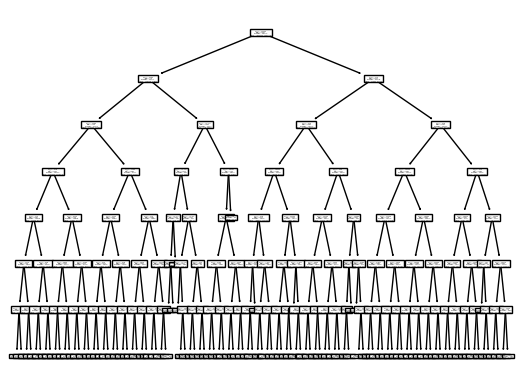

In [17]:
tree.plot_tree(clf)